In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['SETIGEN_ENABLE_GPU'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
import blimpy as bl

import setigen as stg

import h5py


In [2]:
%matplotlib inline

Blocks:   0%|          | 0/1 [00:00<?, ?it/s]

Blocks: 100%|██████████| 1/1 [01:36<00:00, 96.03s/it]

working stem: test_v_std1_pols1
opening file: test_v_std1_pols1.0000.raw


opening file: test_v_std1_pols1.0001.raw [No such file or directory]
output product 0: 256 spectra
blimpy.waterfall INFO     Detecting intermediate frequency and time resolution data.
blimpy.waterfall INFO     __write_to_hdf5_heavy: For ./test_v_std1_pols1.rawspec.0000.h5, chunk_dim=(10, 1, 65536), blob_dim=(256, 1, 65536), n_blobs=1
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
blimpy.waterfall INFO     __write_to_hdf5_heavy: Processing blob 1 of 1
blimpy.waterfall INFO     Conversion time: 0.71sec
(256, 1, 65536)
DIMENSION_LABELS = ['time' 'feed_id' 'frequency']
az_start = 0.0
data_type = 1
fch1 = 5998.53515625
foff = 0.00286102294921875
ibeam = -1
machine_id = 20
nbeams = 1
nbits = 32
nchans = 65536
nifs = 1
rawdatafile = test_v_std1_pols1.0000.raw
source_name = TMC1
src_dej

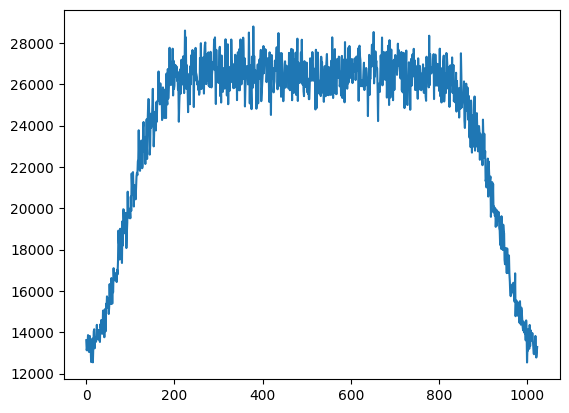

51.856907


In [24]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

chan_bw = sample_rate / num_branches

digitizer = stg.voltage.RealQuantizer(target_fwhm=32,
                                      num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)

requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

antenna = stg.voltage.Antenna(sample_rate=sample_rate, 
                              fch1=6*u.GHz,
                              ascending=True,
                              num_pols=1,
                              seed=42)

rvb = stg.voltage.RawVoltageBackend(antenna,
                                    digitizer=digitizer,
                                    filterbank=filterbank,
                                    requantizer=requantizer,
                                    start_chan=0,
                                    num_chans=64,
                                    block_size=134217728,
                                    blocks_per_file=128,
                                    num_subblocks=32)

for stream in antenna.streams:
    print(stream)
    stream.add_noise(v_mean=0, 
                     v_std=1)
    
save_file_stem = 'test_v_std1_pols1'
rvb.record(output_file_stem=save_file_stem,
           num_blocks=1, 
           length_mode='num_blocks',
           header_dict={'TELESCOP': 'GBT'},
           verbose=False)

!rawspec -f 1024 -t 4 -d . {save_file_stem}
!fil2h5 {save_file_stem}.rawspec.0000.fil

h5_comparison1 = h5py.File(f"{save_file_stem}.rawspec.0000.h5")
h5_comparison1_fildata = h5_comparison1["data"]
h5_comparison1 = h5_comparison1_fildata[:,0,:]
h5_comparison1_slice = h5_comparison1[:,2*1024+200:3*1024-200]

print(h5_comparison1_fildata.shape)
for k in h5_comparison1_fildata.attrs:
    print(f"{k} = {h5_comparison1_fildata.attrs[k]}")


plt.figure()
plt.plot(np.sum(h5_comparison1[:,2*1024:3*1024], 0))
plt.show()

print(np.std(h5_comparison1_slice))

Blocks:   0%|          | 0/1 [00:00<?, ?it/s]

Blocks: 100%|██████████| 1/1 [01:37<00:00, 97.73s/it]

working stem: test_v_std1_pols1
opening file: test_v_std1_pols1.0000.raw


opening file: test_v_std1_pols1.0001.raw [No such file or directory]
output product 0: 256 spectra
blimpy.waterfall INFO     Detecting intermediate frequency and time resolution data.
blimpy.waterfall INFO     __write_to_hdf5_heavy: For ./test_v_std1_pols1.rawspec.0000.h5, chunk_dim=(10, 1, 65536), blob_dim=(256, 1, 65536), n_blobs=1
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
blimpy.waterfall INFO     __write_to_hdf5_heavy: Processing blob 1 of 1
blimpy.waterfall INFO     Conversion time: 0.67sec
(256, 1, 65536)
DIMENSION_LABELS = ['time' 'feed_id' 'frequency']
az_start = 0.0
data_type = 1
fch1 = 5998.53515625
foff = 0.00286102294921875
ibeam = -1
machine_id = 20
nbeams = 1
nbits = 32
nchans = 65536
nifs = 1
rawdatafile = test_v_std1_pols1.0000.raw
source_name = TMC1
src_dej

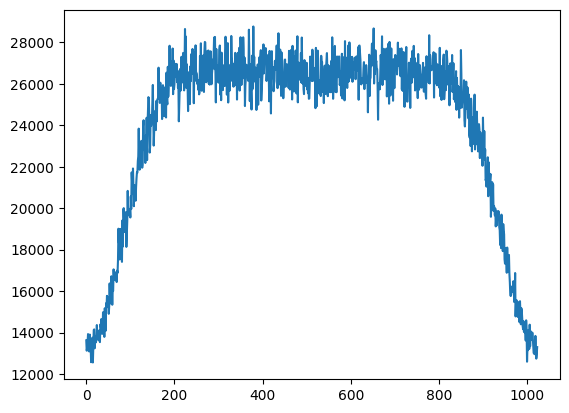

51.939438


In [15]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

chan_bw = sample_rate / num_branches

digitizer = stg.voltage.VRefQuantizer(v_ref=16, num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)

requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

antenna = stg.voltage.Antenna(sample_rate=sample_rate, 
                              fch1=6*u.GHz,
                              ascending=True,
                              num_pols=1,
                              seed=42)

rvb = stg.voltage.RawVoltageBackend(antenna,
                                    digitizer=digitizer,
                                    filterbank=filterbank,
                                    requantizer=requantizer,
                                    start_chan=0,
                                    num_chans=64,
                                    block_size=134217728,
                                    blocks_per_file=128,
                                    num_subblocks=32)

for stream in antenna.streams:
    print(stream)
    stream.add_noise(v_mean=0, 
                     v_std=1)
    
save_file_stem = 'test_v_std1_pols1'
rvb.record(output_file_stem=save_file_stem,
           num_blocks=1, 
           length_mode='num_blocks',
           header_dict={'TELESCOP': 'GBT'},
           verbose=False)

!rawspec -f 1024 -t 4 -d . {save_file_stem}
!fil2h5 {save_file_stem}.rawspec.0000.fil

h5_comparison1 = h5py.File(f"{save_file_stem}.rawspec.0000.h5")
h5_comparison1_fildata = h5_comparison1["data"]
h5_comparison1 = h5_comparison1_fildata[:,0,:]
h5_comparison1_slice = h5_comparison1[:,2*1024+200:3*1024-200]

print(h5_comparison1_fildata.shape)
for k in h5_comparison1_fildata.attrs:
    print(f"{k} = {h5_comparison1_fildata.attrs[k]}")


plt.figure()
plt.plot(np.sum(h5_comparison1[:,2*1024:3*1024], 0))
plt.show()

print(np.std(h5_comparison1_slice))

In [16]:
digitizer.quantize(antenna.get_samples(100))

array([[[ 11, -15,  -7,   2,   3,  10,  -6,  -1, -11,  -8,   7,   6,
          -4,   6,   4,  10,  11,   1,  -5,   3,   2,  -4,   7,   8,
          -1,  11,  -8,   7,   6,  -4,  -2,   1,  -1,   8,   4,   2,
           0,   1,   6,   5,  14,   7,  -8,   5,   4,  -4,   2,  -8,
          -5,  -7,  -1,  -6, -11,  -2,  -1,  13,  -3,  19,   8,   4,
          -2,  -2,  -7,  -3,  -6,  -2,   9, -13,  11,   5,  12, -11,
          -2,   5,   8,  -3,   0,   6,  14, -10,   3,  -2,   2,   3,
          -1,  -2,  -5,  -6, -14,   7,   5,   1,  18, -10,   8, -12,
          11,   3,  -8,  -1]]])

In [19]:
antenna = stg.voltage.Antenna(sample_rate=sample_rate, 
                              fch1=6*u.GHz,
                              ascending=True,
                              num_pols=1,
                              seed=42)

for stream in antenna.streams:
    print(stream)
    stream.add_noise(v_mean=0, 
                     v_std=5000)

digitizer.quantize(antenna.get_samples(100))

array([[[ 127,  127, -128, -128,  127, -128, -128, -128,  127,  127,
         -128,  127, -128, -128, -128,  127,  127, -128,  127, -128,
          127, -128, -128, -128, -128,  127, -128,  127,  127, -128,
          127, -128,  127,  127, -128,  127,  127, -128,  127,  127,
         -128, -128, -128,  127, -128,  127,  127, -128, -128, -128,
          127,  127,  127, -128, -128,  127,  127, -128, -128, -128,
         -128,  127, -128,  127, -128,  127,  127, -128, -128,  127,
          127, -128, -128,  127, -128, -128, -128, -128,  127, -128,
          127,  127, -128,  127,  127,  127,  127,  127,  127, -128,
          127, -128, -128,  127,  127, -128, -128,  127,  127,  127]]])

Blocks:   0%|          | 0/1 [00:00<?, ?it/s]

Blocks: 100%|██████████| 1/1 [01:37<00:00, 97.75s/it]

working stem: test_v_std1_pols1
opening file: test_v_std1_pols1.0000.raw


opening file: test_v_std1_pols1.0001.raw [No such file or directory]
output product 0: 256 spectra
blimpy.waterfall INFO     Detecting intermediate frequency and time resolution data.
blimpy.waterfall INFO     __write_to_hdf5_heavy: For ./test_v_std1_pols1.rawspec.0000.h5, chunk_dim=(10, 1, 65536), blob_dim=(256, 1, 65536), n_blobs=1
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
blimpy.waterfall INFO     __write_to_hdf5_heavy: Processing blob 1 of 1
blimpy.waterfall INFO     Conversion time: 0.65sec
(256, 1, 65536)
DIMENSION_LABELS = ['time' 'feed_id' 'frequency']
az_start = 0.0
data_type = 1
fch1 = 5998.53515625
foff = 0.00286102294921875
ibeam = -1
machine_id = 20
nbeams = 1
nbits = 32
nchans = 65536
nifs = 1
rawdatafile = test_v_std1_pols1.0000.raw
source_name = TMC1
src_dej

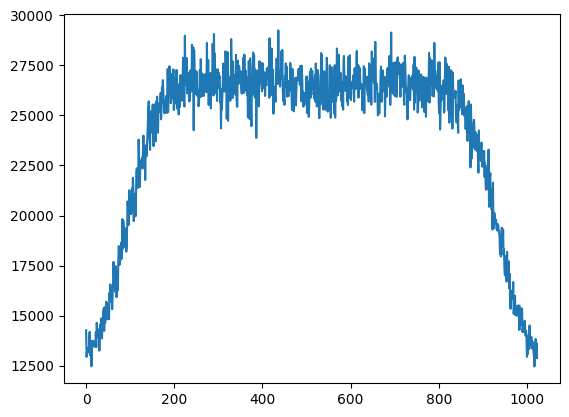

52.050488


In [17]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

chan_bw = sample_rate / num_branches

digitizer = VRefQuantizer(v_ref=16, num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)

requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

antenna = stg.voltage.Antenna(sample_rate=sample_rate, 
                              fch1=6*u.GHz,
                              ascending=True,
                              num_pols=1,
                              seed=42)

rvb = stg.voltage.RawVoltageBackend(antenna,
                                    digitizer=digitizer,
                                    filterbank=filterbank,
                                    requantizer=requantizer,
                                    start_chan=0,
                                    num_chans=64,
                                    block_size=134217728,
                                    blocks_per_file=128,
                                    num_subblocks=32)

for stream in antenna.streams:
    print(stream)
    stream.add_noise(v_mean=0, 
                     v_std=5000)
    
save_file_stem = 'test_v_std1_pols1'
rvb.record(output_file_stem=save_file_stem,
           num_blocks=1, 
           length_mode='num_blocks',
           header_dict={'TELESCOP': 'GBT'},
           verbose=False)

!rawspec -f 1024 -t 4 -d . {save_file_stem}
!fil2h5 {save_file_stem}.rawspec.0000.fil

h5_comparison1 = h5py.File(f"{save_file_stem}.rawspec.0000.h5")
h5_comparison1_fildata = h5_comparison1["data"]
h5_comparison1 = h5_comparison1_fildata[:,0,:]
h5_comparison1_slice = h5_comparison1[:,2*1024+200:3*1024-200]

print(h5_comparison1_fildata.shape)
for k in h5_comparison1_fildata.attrs:
    print(f"{k} = {h5_comparison1_fildata.attrs[k]}")


plt.figure()
plt.plot(np.sum(h5_comparison1[:,2*1024:3*1024], 0))
plt.show()

print(np.std(h5_comparison1_slice))

Blocks:   0%|          | 0/1 [00:00<?, ?it/s]

Blocks: 100%|██████████| 1/1 [01:33<00:00, 93.99s/it]

working stem: test_v_std1_pols1
opening file: test_v_std1_pols1.0000.raw


opening file: test_v_std1_pols1.0001.raw [No such file or directory]
output product 0: 256 spectra
blimpy.waterfall INFO     Detecting intermediate frequency and time resolution data.
blimpy.waterfall INFO     __write_to_hdf5_heavy: For ./test_v_std1_pols1.rawspec.0000.h5, chunk_dim=(10, 1, 65536), blob_dim=(256, 1, 65536), n_blobs=1
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
blimpy.waterfall INFO     __write_to_hdf5_heavy: Processing blob 1 of 1
blimpy.waterfall INFO     Conversion time: 0.64sec
(256, 1, 65536)
DIMENSION_LABELS = ['time' 'feed_id' 'frequency']
az_start = 0.0
data_type = 1
fch1 = 5998.53515625
foff = 0.00286102294921875
ibeam = -1
machine_id = 20
nbeams = 1
nbits = 32
nchans = 65536
nifs = 1
rawdatafile = test_v_std1_pols1.0000.raw
source_name = TMC1
src_dej

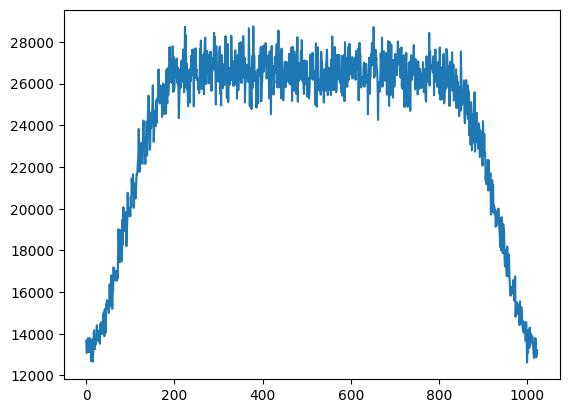

51.95035


In [10]:
sample_rate = 3e9
num_taps = 8
num_branches = 1024

chan_bw = sample_rate / num_branches

digitizer = VRefQuantizer(v_ref=16, num_bits=8)

filterbank = stg.voltage.PolyphaseFilterbank(num_taps=num_taps, 
                                             num_branches=num_branches)

requantizer = stg.voltage.ComplexQuantizer(target_fwhm=32,
                                           num_bits=8)

antenna = stg.voltage.Antenna(sample_rate=sample_rate, 
                              fch1=6*u.GHz,
                              ascending=True,
                              num_pols=1,
                              seed=42)

rvb = stg.voltage.RawVoltageBackend(antenna,
                                    digitizer=digitizer,
                                    filterbank=filterbank,
                                    requantizer=requantizer,
                                    start_chan=0,
                                    num_chans=64,
                                    block_size=134217728,
                                    blocks_per_file=128,
                                    num_subblocks=32)

for stream in antenna.streams:
    print(stream)
    stream.add_noise(v_mean=0, 
                     v_std=8)
    
save_file_stem = 'test_v_std1_pols1'
rvb.record(output_file_stem=save_file_stem,
           num_blocks=1, 
           length_mode='num_blocks',
           header_dict={'TELESCOP': 'GBT'},
           verbose=False)

!rawspec -f 1024 -t 4 -d . {save_file_stem}
!fil2h5 {save_file_stem}.rawspec.0000.fil

h5_comparison1 = h5py.File(f"{save_file_stem}.rawspec.0000.h5")
h5_comparison1_fildata = h5_comparison1["data"]
h5_comparison1 = h5_comparison1_fildata[:,0,:]
h5_comparison1_slice = h5_comparison1[:,2*1024+200:3*1024-200]

print(h5_comparison1_fildata.shape)
for k in h5_comparison1_fildata.attrs:
    print(f"{k} = {h5_comparison1_fildata.attrs[k]}")


plt.figure()
plt.plot(np.sum(h5_comparison1[:,2*1024:3*1024], 0))
plt.show()

print(np.std(h5_comparison1_slice))

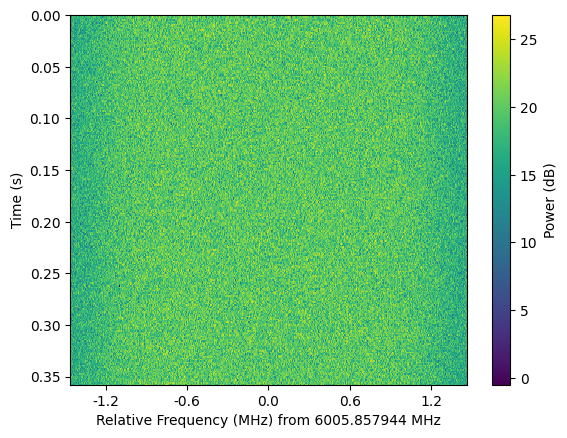

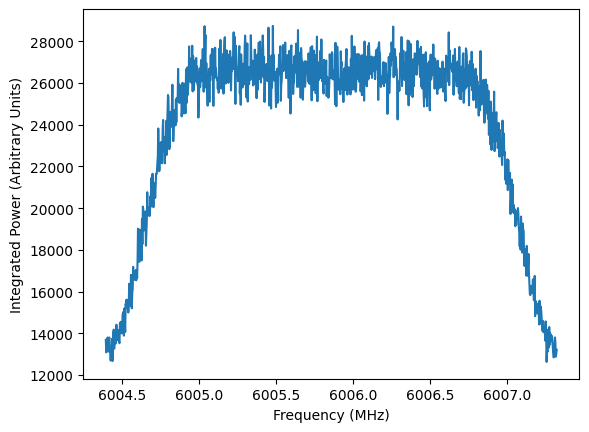

In [12]:
frame = stg.Frame(f"{save_file_stem}.rawspec.0000.h5", 
                  f_start=rvb.get_coarse_freq(2),
                  f_stop=rvb.get_coarse_freq(3))
frame.plot()
plt.show()
stg.spectrum(frame, mode='sum').plot(ftype='f');

In [13]:
frame.shape

(256, 1024)